# Imports, uploads, overview

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import phik
import matplotlib.pyplot as plt
import seaborn as sns

#ML
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV

#preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Visualizations
from IPython.display import display, HTML, Image
display(HTML("<style>.container { width:85% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 100
pd.set_option('max_colwidth', 200)
pd.set_option('display.width', 400)
pd.set_option('display.max_columns', 50)

# Fixed random state 
rs = 112022

In [54]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1b7DyUp4DCbrNcIIC86frrB-jse-JPc7o')
df_test = pd.read_csv('https://drive.google.com/uc?export=download&id=110QKB0XuG_8sxKWqglKP47bv9lrHqsXP')

In [55]:
display(df.head(),
        df.tail())

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
0,715630983,31,F,0,Graduate,Single,Less than $40K,Blue,21,4,2,3,4598.0,0,4598.0,0.439,6317,77,0.833,0.000,Attrited Customer
1,713643858,53,F,1,College,Married,$40K - $60K,Blue,43,4,4,2,1525.0,1411,114.0,0.660,1911,47,0.958,0.925,Existing Customer
2,708334158,46,F,3,Graduate,Divorced,Less than $40K,Blue,34,4,2,4,9863.0,686,9177.0,0.581,3068,58,0.933,0.070,Existing Customer
3,711033408,50,F,2,High School,Married,Less than $40K,Blue,36,5,1,2,9355.0,1626,7729.0,0.701,1230,28,0.867,0.174,Existing Customer
4,711368283,39,M,2,Unknown,Married,$80K - $120K,Blue,27,3,3,2,34516.0,1629,32887.0,1.078,3448,53,1.038,0.047,Existing Customer


,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
7590,772596783,31,M,1,Graduate,Unknown,Less than $40K,Gold,21,3,2,2,15261.0,1109,14152.0,0.655,15442,125,0.761,0.073,Existing Customer
7591,820330008,46,M,5,High School,Married,$120K +,Blue,42,1,1,3,32926.0,1540,31386.0,0.862,8231,98,0.556,0.047,Existing Customer
7592,720614658,40,M,2,High School,Divorced,$60K - $80K,Blue,25,6,4,2,2978.0,0,2978.0,0.490,3879,95,0.583,0.000,Existing Customer
7593,709759908,46,M,2,Graduate,Married,$60K - $80K,Blue,36,4,2,2,1939.0,685,1254.0,0.421,4327,84,0.680,0.353,Existing Customer
7594,814489683,34,F,2,Unknown,Single,Less than $40K,Blue,29,3,1,0,5387.0,795,4592.0,0.837,2596,59,1.034,0.148,Existing Customer


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7595 entries, 0 to 7594
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 7595 non-null   int64  
 1   Customer_Age              7595 non-null   int64  
 2   Gender                    7595 non-null   object 
 3   Dependent_count           7595 non-null   int64  
 4   Education_Level           7595 non-null   object 
 5   Marital_Status            7595 non-null   object 
 6   Income_Category           7595 non-null   object 
 7   Card_Category             7595 non-null   object 
 8   Months_on_book            7595 non-null   int64  
 9   Total_Relationship_Count  7595 non-null   int64  
 10  Months_Inactive_12_mon    7595 non-null   int64  
 11  Contacts_Count_12_mon     7595 non-null   int64  
 12  Credit_Limit              7595 non-null   float64
 13  Total_Revolving_Bal       7595 non-null   int64  
 14  Avg_Open

In [57]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,7.595000e+03,7595.000000,7595.000000,7595.000000,7595.000000,7595.000000,7595.000000,7595.000000,7595.000000,7595.000000,7595.00000,7595.000000,7595.000000,7595.000000,7595.000000
mean,7.393515e+08,46.302962,2.353259,35.929427,3.814352,2.354575,2.458328,8654.540276,1165.152337,7489.387939,0.75955,4401.725082,64.812640,0.712562,0.273745
std,3.698152e+07,7.951111,1.298548,7.899472,1.547264,1.009706,1.105780,9102.153894,813.742319,9101.371884,0.22115,3402.500709,23.536378,0.240984,0.274267
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.00000,530.000000,10.000000,0.000000,0.000000
25%,7.130482e+08,41.000000,1.000000,32.000000,3.000000,2.000000,2.000000,2554.000000,453.000000,1352.500000,0.63100,2144.000000,45.000000,0.579000,0.025000
50%,7.179543e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4562.000000,1285.000000,3492.000000,0.73700,3895.000000,67.000000,0.700000,0.176000
75%,7.741359e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11104.000000,1779.000000,9894.000000,0.85800,4738.500000,80.000000,0.821000,0.496000
max,8.282989e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.39700,18484.000000,139.000000,3.714000,0.999000


# EDA

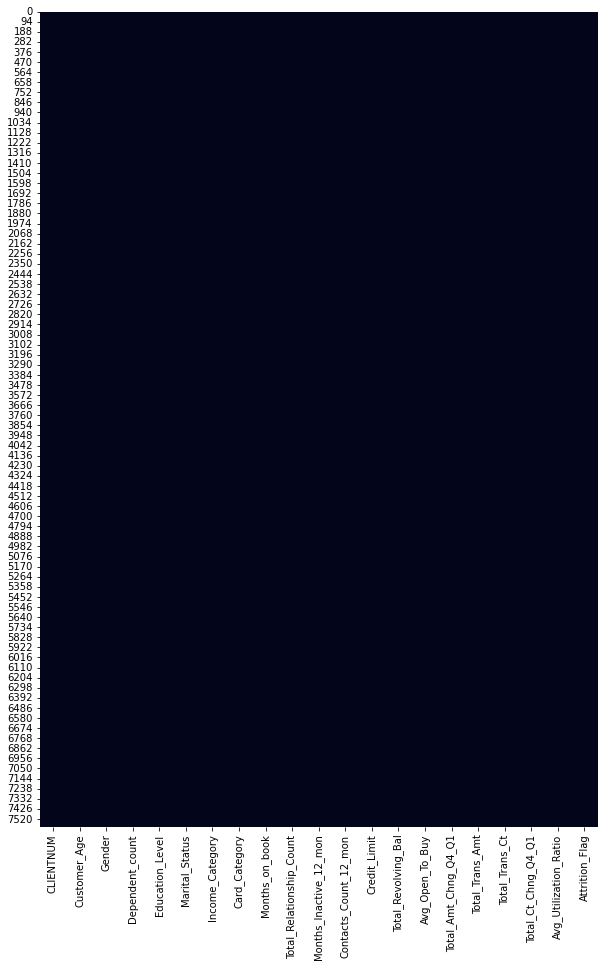

In [58]:
fig = plt.subplots(figsize = (10, 15))
sns.heatmap(df.isna(), cbar=False)
plt.show()

Пропусков в данных нет. <br>
Максимальные значения до 30000, достаточно будет размерности в 16 бит, также приведем тип `object` к типу `category` и приведем название к змеиному регистру

In [59]:
df.head(2)

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
0,715630983,31,F,0,Graduate,Single,Less than $40K,Blue,21,4,2,3,4598.0,0,4598.0,0.439,6317,77,0.833,0.000,Attrited Customer
1,713643858,53,F,1,College,Married,$40K - $60K,Blue,43,4,4,2,1525.0,1411,114.0,0.660,1911,47,0.958,0.925,Existing Customer


In [60]:
# to snake case

for dataframe in [df, df_test]:
    new_columns = []
    for name in dataframe.columns:
        new_columns.append(name.lower())
    dataframe.columns = new_columns

In [62]:
df.attrition_flag = df.attrition_flag.replace({'Attrited Customer': 1, 'Existing Customer': 0})
df

,clientnum,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,attrition_flag
0,715630983,31,F,0,Graduate,Single,Less than $40K,Blue,21,4,2,3,4598.0,0,4598.0,0.439,6317,77,0.833,0.000,1
1,713643858,53,F,1,College,Married,$40K - $60K,Blue,43,4,4,2,1525.0,1411,114.0,0.660,1911,47,0.958,0.925,0
2,708334158,46,F,3,Graduate,Divorced,Less than $40K,Blue,34,4,2,4,9863.0,686,9177.0,0.581,3068,58,0.933,0.070,0
3,711033408,50,F,2,High School,Married,Less than $40K,Blue,36,5,1,2,9355.0,1626,7729.0,0.701,1230,28,0.867,0.174,0
4,711368283,39,M,2,Unknown,Married,$80K - $120K,Blue,27,3,3,2,34516.0,1629,32887.0,1.078,3448,53,1.038,0.047,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7590,772596783,31,M,1,Graduate,Unknown,Less than $40K,Gold,21,3,2,2,15261.0,1109,14152.0,0.655,15442,125,0.761,0.073,0
7591,820330008,46,M,5,High School,Married,$120K +,Blue,42,1,1,3,32926.0,1540,31386.0,0.862,8231,98,0.556,0.047,0
7592,720614658,40,M,2,High School,Divorced,$60K - $80K,Blue,25,6,4,2,2978.0,0,2978.0,0.490,3879,95,0.583,0.000,0
7593,709759908,46,M,2,Graduate,Married,$60K - $80K,Blue,36,4,2,2,1939.0,685,1254.0,0.421,4327,84,0.680,0.353,0


In [63]:
# change data types

cat_cols_train = [i for i in df.columns if type(df[i][0]) == str]
cat_cols_test = [i for i in df_test.columns if type(df_test[i][0]) == str]

float_cols_train = [i for i in df.columns if 'float' in str(type(df[i][0]))]
float_cols_test = [i for i in df_test.columns if 'float' in str(type(df_test[i][0]))]

int_cols_train = [i for i in df.columns if 'int' in str(type(df[i][0]))]
int_cols_test = [i for i in df_test.columns if 'int' in str(type(df_test[i][0]))]

df[cat_cols_train] = df[cat_cols_train].astype('category')
df_test[cat_cols_test] = df_test[cat_cols_test].astype('category')

df[int_cols_train] = df[int_cols_train].astype('int16')
df_test[int_cols_test] = df_test[int_cols_test].astype('int16')

df[float_cols_train] = df[float_cols_train].astype('float16')
df_test[float_cols_test] = df_test[float_cols_test].astype('float16')

In [64]:
num_cols_train = float_cols_train + int_cols_train
num_cols_train

['credit_limit',
 'avg_open_to_buy',
 'total_amt_chng_q4_q1',
 'total_ct_chng_q4_q1',
 'avg_utilization_ratio',
 'clientnum',
 'customer_age',
 'dependent_count',
 'months_on_book',
 'total_relationship_count',
 'months_inactive_12_mon',
 'contacts_count_12_mon',
 'total_revolving_bal',
 'total_trans_amt',
 'total_trans_ct',
 'attrition_flag']

Проанализируем данные на выбросы

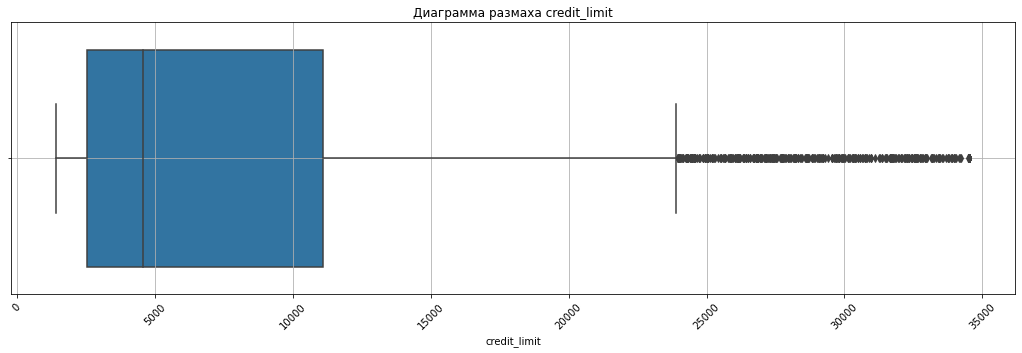

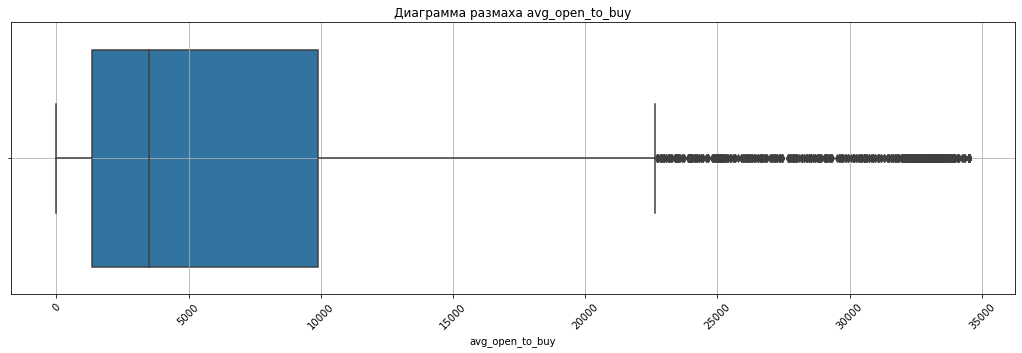

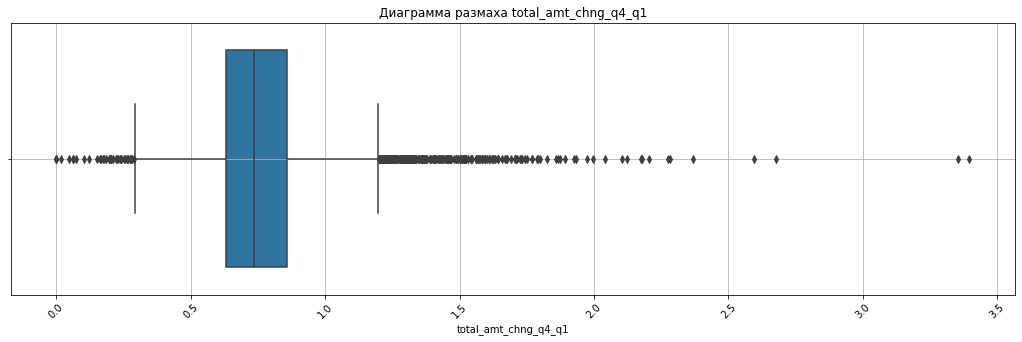

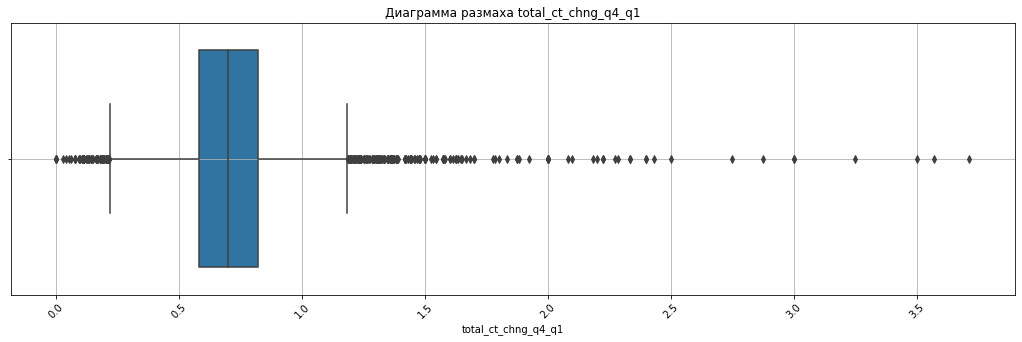

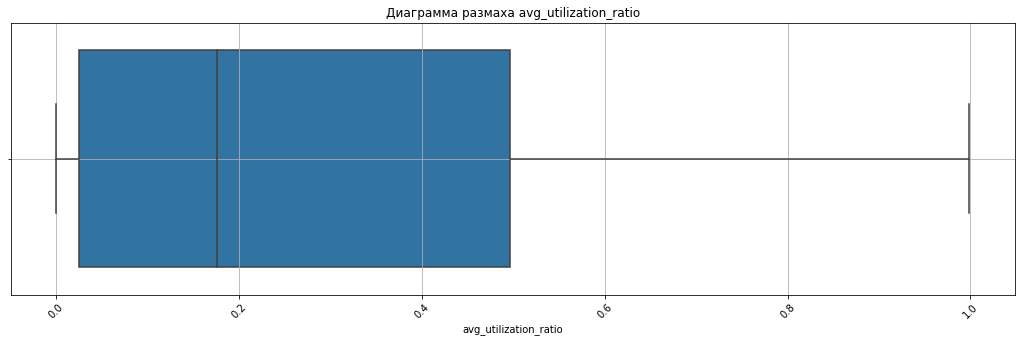

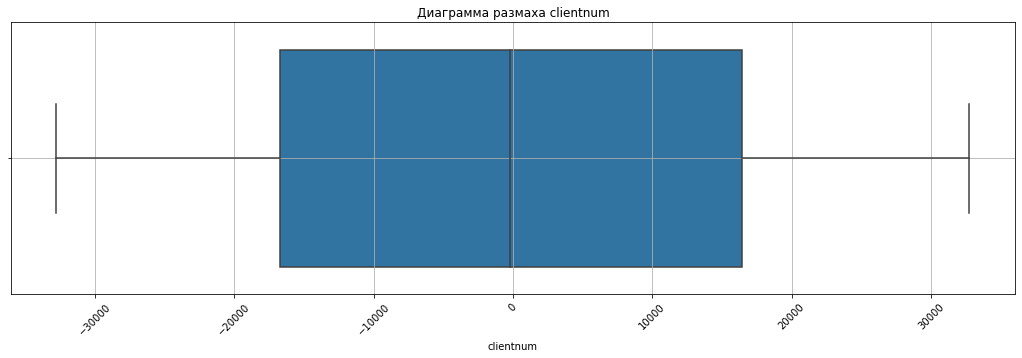

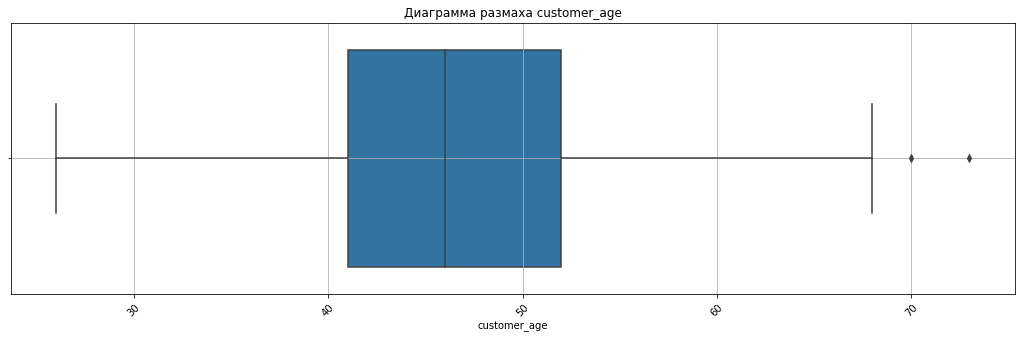

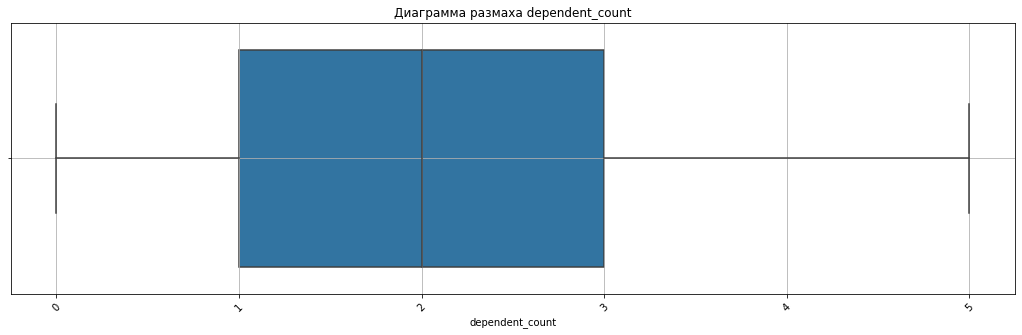

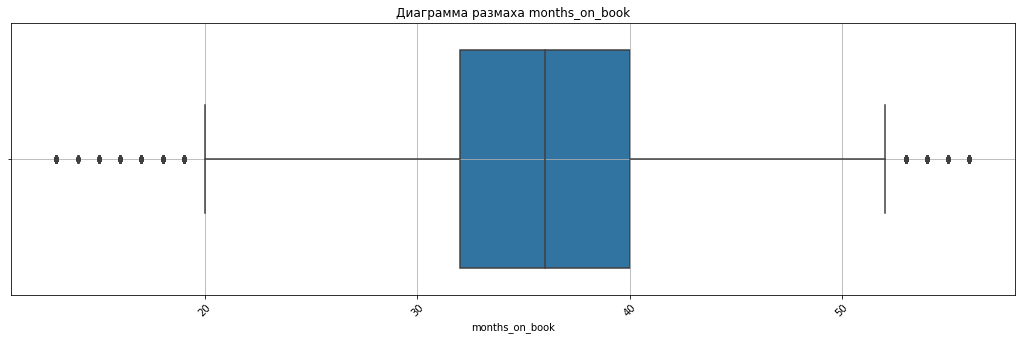

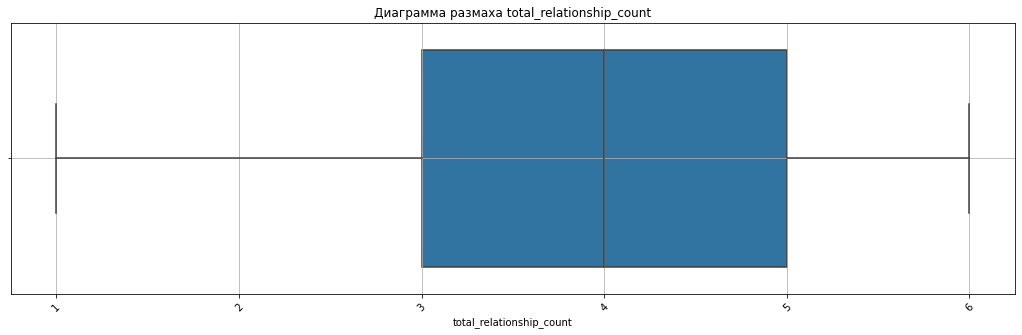

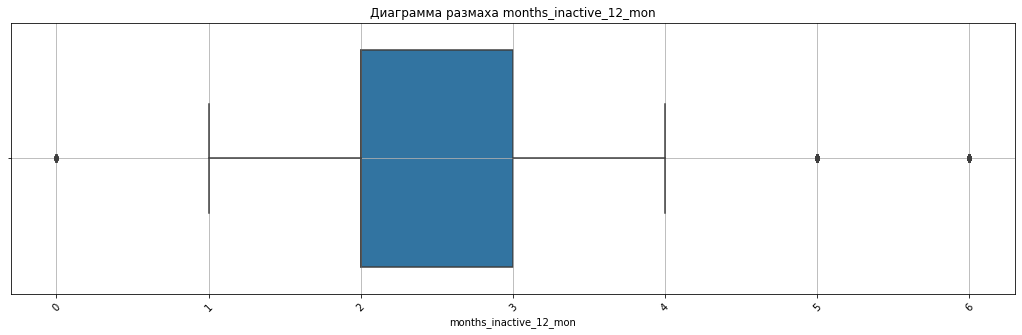

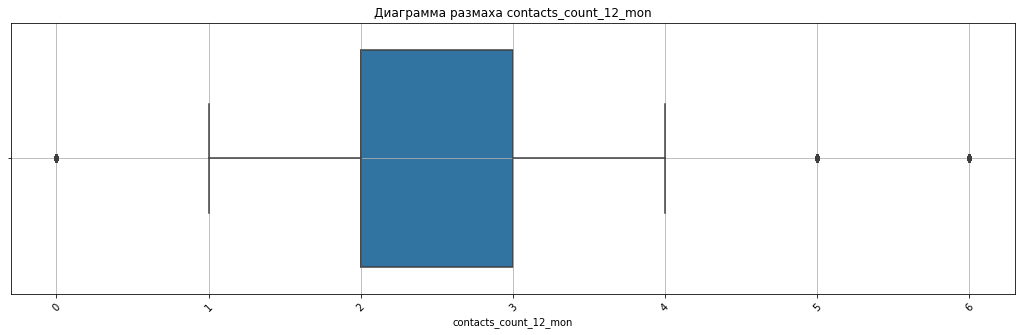

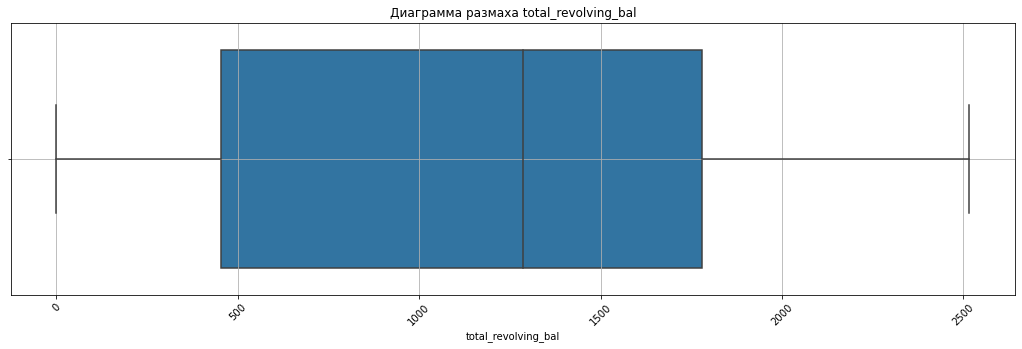

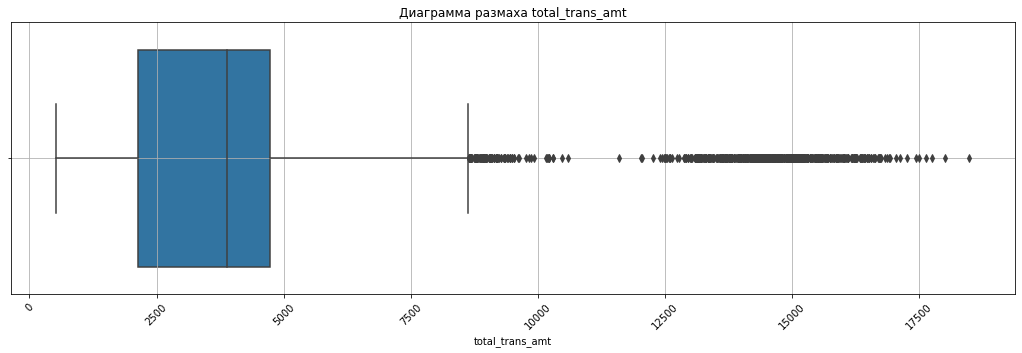

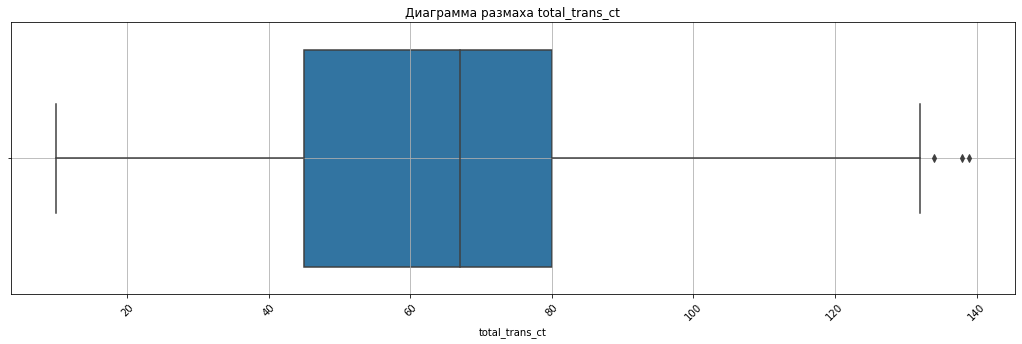

In [13]:
for col in num_cols_train:
    fig, ax = plt.subplots(figsize=(18,5))
    ax = sns.boxplot(data=df, x=col)
    ax.set_title(f'Диаграмма размаха {col}')
#     ax.set_xticks(range(0, 15000, 500))
    plt.xticks(rotation=45)
    plt.grid()
    plt.show();

In [65]:
# Избавимся от выбросов
for dataframe in [df, df_test]:
    dataframe = dataframe \
        .query("total_amt_chng_q4_q1 <= 1.5") \
        .query("total_ct_chng_q4_q1 <= 1.5") \
        .query("total_trans_ct < 130") \
        .query("customer_age < 70")

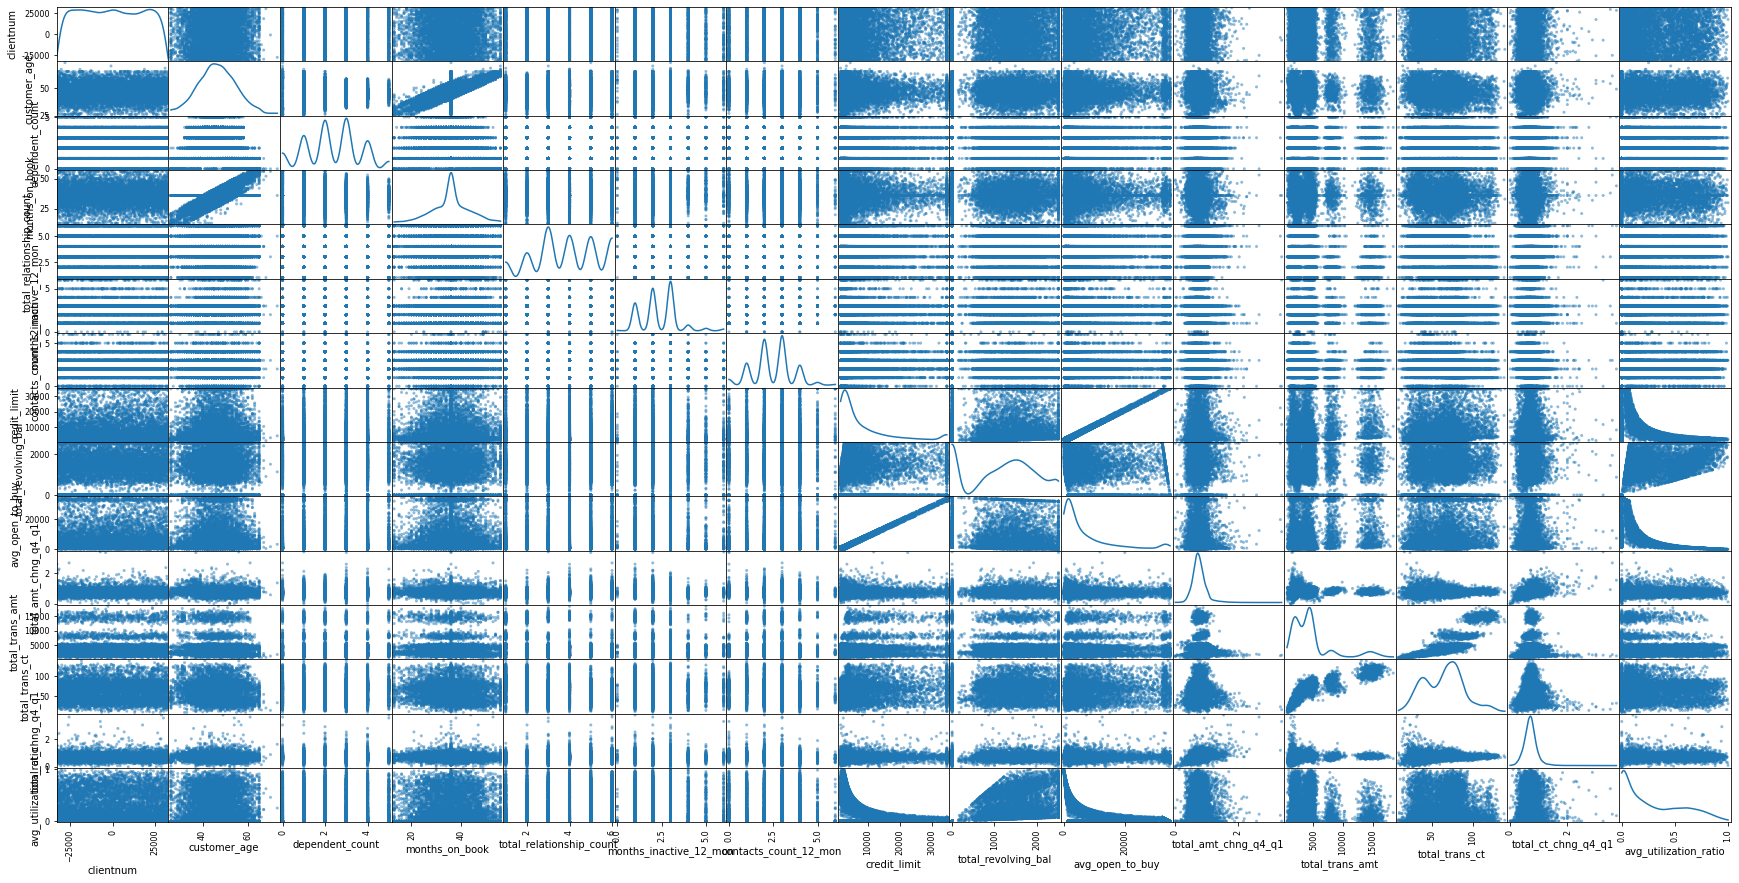

In [15]:
pd.plotting.scatter_matrix(df, figsize=(30,15), diagonal='kde');

In [16]:
df.phik_matrix()

interval columns not set, guessing: ['clientnum', 'customer_age', 'dependent_count', 'months_on_book', 'total_relationship_count', 'months_inactive_12_mon', 'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal', 'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt', 'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio']


,clientnum,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,attrition_flag
clientnum,1.000000,0.000000,0.000000,0.032370,0.000000,0.000000,0.000000,0.036955,0.000000,0.000000,0.020083,0.000000,0.000000,0.036131,0.000000,0.024214,0.000000,0.000000,0.033995,0.014603,0.006752
customer_age,0.000000,1.000000,0.000000,0.504914,0.014481,0.136601,0.163649,0.033064,0.837396,0.066669,0.075052,0.056162,0.083369,0.044589,0.095160,0.118212,0.199832,0.193173,0.137498,0.079055,0.041415
gender,0.000000,0.000000,1.000000,0.010315,0.006219,0.025892,0.969509,0.118042,0.000000,0.000000,0.000000,0.058520,0.556526,0.042526,0.565219,0.047614,0.316212,0.212265,0.063402,0.368259,0.044260
dependent_count,0.032370,0.504914,0.010315,1.000000,0.014046,0.060509,0.113979,0.018867,0.326642,0.057847,0.000000,0.012580,0.063557,0.000000,0.057915,0.039104,0.058564,0.059862,0.050233,0.028760,0.024328
education_level,0.000000,0.014481,0.006219,0.014046,1.000000,0.017654,0.025061,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030974,0.018702,0.000000,0.038199,0.024674,0.000000,0.000000,0.019591
marital_status,0.000000,0.136601,0.025892,0.060509,0.017654,1.000000,0.011457,0.072523,0.072920,0.032783,0.022080,0.020703,0.042945,0.020052,0.045284,0.082938,0.165373,0.159484,0.043484,0.047648,0.039030
income_category,0.000000,0.163649,0.969509,0.113979,0.025061,0.011457,1.000000,0.083899,0.091412,0.000000,0.027362,0.027326,0.478581,0.047286,0.480546,0.035382,0.169596,0.112587,0.047834,0.305748,0.015449
card_category,0.036955,0.033064,0.118042,0.018867,0.000000,0.072523,0.083899,1.000000,0.000000,0.110381,0.000000,0.016374,0.523548,0.027258,0.529333,0.038376,0.268134,0.188152,0.000000,0.250028,0.000000
months_on_book,0.000000,0.837396,0.000000,0.326642,0.000000,0.072920,0.091412,0.000000,1.000000,0.000000,0.133135,0.044303,0.063784,0.000000,0.067947,0.069639,0.144994,0.126586,0.000000,0.070815,0.026964
total_relationship_count,0.000000,0.066669,0.000000,0.057847,0.000000,0.032783,0.000000,0.110381,0.000000,1.000000,0.012619,0.125089,0.084207,0.046570,0.079329,0.084447,0.413564,0.334630,0.064353,0.071080,0.232476


interval columns not set, guessing: ['clientnum', 'customer_age', 'dependent_count', 'months_on_book', 'total_relationship_count', 'months_inactive_12_mon', 'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal', 'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt', 'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio']


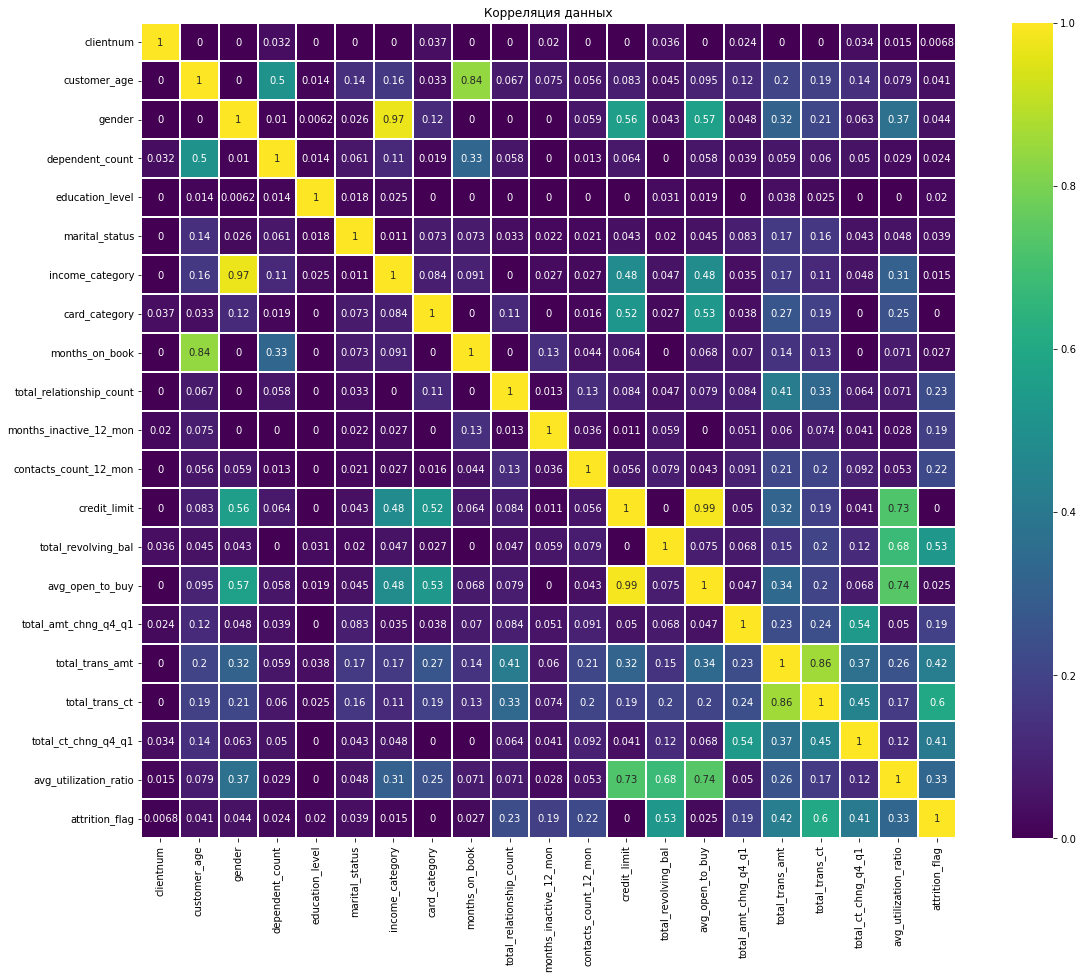

In [17]:
plt.subplots(figsize=(20,15))
sns.heatmap(data=df.phik_matrix(), square=True, cmap='viridis',linecolor="white", linewidths=0.005, annot=True)
plt.title('Корреляция данных');

Удалим признаки с высокой корреляцией по шкале Чеддока (>0.7) 

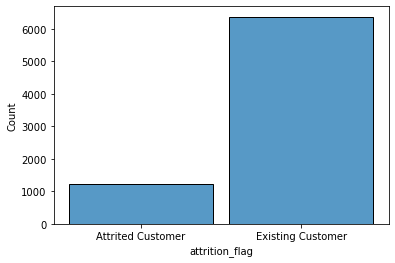

In [18]:
sns.histplot(data=df, x='attrition_flag', bins=2, shrink=0.9);

In [66]:
# закодируем категориальные переменные

cat_cols_train = [i for i in df.columns if type(df[i][0]) == str]
for col in cat_cols_train:
    df[col] = df[col].cat.codes
    
cat_cols_test = [i for i in df_test.columns if type(df_test[i][0]) == str]
for col in cat_cols_test:
    df_test[col] = df_test[col].cat.codes

In [67]:
df.drop(['clientnum', 'credit_limit', 'months_on_book', 'gender', 'total_trans_ct'], axis=1, inplace=True)
df_test.drop(['credit_limit', 'months_on_book', 'gender', 'total_trans_ct'], axis=1, inplace=True)
df_test = df_test.set_index('clientnum')

# Подбор параметров и обучение

In [68]:
X = df.drop('attrition_flag', axis=1)
y = df['attrition_flag']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=rs, stratify=y)

In [70]:
sm = SMOTE(random_state = rs)
X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)

In [71]:
# масштабируем

scaler = StandardScaler()
X_train_oversampled = scaler.fit_transform(X_train_oversampled)
X_test = scaler.transform(X_test)
df_test = scaler.transform(df_test)

## Random Forest Classifier

In [72]:
rfc = RandomForestClassifier(random_state=rs)
params = {'n_estimators': range(100,501,100),
          'max_depth': range(2,13),
          'min_samples_leaf': range(1,3), 
          'min_samples_split': range(1,4)}
RSCV = RandomizedSearchCV(rfc, params, cv=5, scoring='f1')

In [73]:
%%time

RSCV.fit(X_train_oversampled, y_train_oversampled)
print(RSCV.best_score_)
print(RSCV.best_params_)
rfc_best_est = RSCV.best_estimator_
rfc_score = RSCV.best_score_

0.9509574580589237
{'n_estimators': 500, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_depth': 12}
Wall time: 1min 25s


## XGBoost Classifier

In [74]:
xgbc = XGBClassifier(random_state=rs)
params = {'n_estimators': range(300,601,100),
          'max_depth': range(4,10),
          'max_leaves': range(2,7),
          'booster': ['gbtree', 'gblinear']}
RSCV_xgb = RandomizedSearchCV(xgbc, params, cv=5, scoring='f1')

In [75]:
%%time

RSCV_xgb.fit(X_train_oversampled, y_train_oversampled)
print(RSCV_xgb.best_score_)
print(RSCV_xgb.best_params_)
xgb_best_est = RSCV_xgb.best_estimator_
xgb_score = RSCV_xgb.best_score_

[01:44:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth", "max_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[01:44:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth", "max_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[01:44:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth", "max_le

## LGBMClassifier

In [76]:
lgbm = LGBMClassifier(random_state=rs)
params = {'n_estimators': range(500,1001,100),
          'max_depth': range(5,12),
          'num_leaves': range(11,28),
          'boosting_type': ['gbdt', 'goss']}
RSCV_lgbm = RandomizedSearchCV(lgbm, params, cv=5, scoring='f1')

In [77]:
%%time

RSCV_lgbm.fit(X_train_oversampled, y_train_oversampled)
print(RSCV_lgbm.best_score_)
print(RSCV_lgbm.best_params_)
lgbm_best_est = RSCV_lgbm.best_estimator_
lgbm_score = RSCV_lgbm.best_score_

0.9674953080756337
{'num_leaves': 20, 'n_estimators': 700, 'max_depth': 8, 'boosting_type': 'gbdt'}
Wall time: 44.5 s


In [78]:
results = pd.DataFrame(data=[rfc_score, xgb_score, lgbm_score],
                       index=['rfc_score', 'xgb_score', 'lgbm_score'],
                       columns=['f1_score'])
results.sort_values(by='f1_score', ascending=False)

,f1_score
lgbm_score,0.967495
xgb_score,0.966699
rfc_score,0.950957


# Testing

In [79]:
%%time

best_model = lgbm_best_est
lgbm_pred = best_model.predict(X_test)
print(f'f1-score={round(f1_score(y_test, lgbm_pred), 2)}')

f1-score=0.87
Wall time: 60.8 ms


In [80]:
print(classification_report(y_test, lgbm_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1594
           1       0.87      0.87      0.87       305

    accuracy                           0.96      1899
   macro avg       0.92      0.92      0.92      1899
weighted avg       0.96      0.96      0.96      1899



AUC-ROC =  0.9726


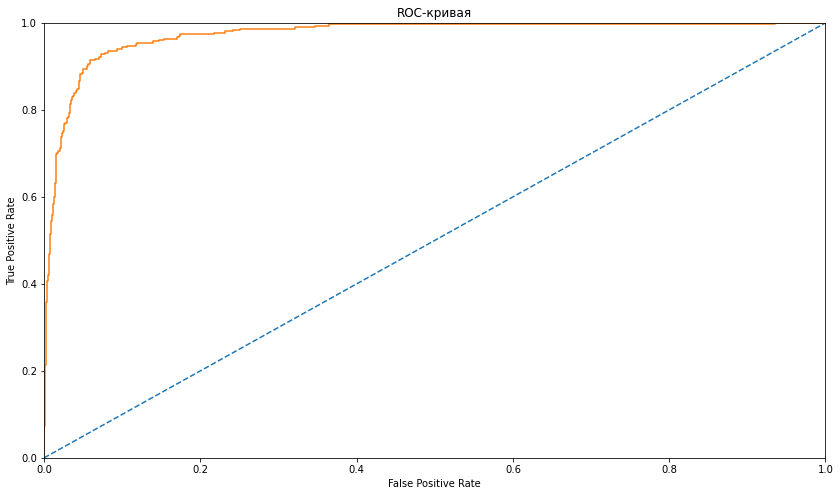

In [81]:
# отрисуем ROC-кривую

probabilities_valid = rfc_best_est.predict_proba(X_test)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(y_test,probabilities_one_valid)
print("AUC-ROC = ", round(auc_roc, 4))

fig, ax = plt.subplots(figsize=(14,8))
fpr, tpr, thresholds = roc_curve(y_test, probabilities_one_valid)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

Метрика F1 на тесте = 0.87, что является довольно высоким результатом. Модель можно использовать для предсказания

# Predicting

In [102]:
test_predict = best_model.predict(df_test)

In [103]:
df_test_final = pd.read_csv('https://drive.google.com/uc?export=download&id=110QKB0XuG_8sxKWqglKP47bv9lrHqsXP')

In [104]:
df_test_final.columns = [col.lower() for col in df_test_final.columns]

In [105]:
df_test_final['attrition_predicted'] = test_predict

In [109]:
df_test_final.rename({'clientnum': 'client_id', 'attrition_predicted': 'churn'}, axis=1, inplace=True)

In [110]:
df_test_final

,client_id,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,churn
0,719682183,53,F,2,Unknown,Single,$40K - $60K,Blue,43,3,4,4,6188.0,2517,3671.0,0.713,1997,43,1.048,0.407,0
1,711341433,34,F,2,Graduate,Single,Unknown,Blue,24,6,3,3,3095.0,2010,1085.0,0.668,3901,77,0.711,0.649,0
2,716154258,48,M,4,Doctorate,Unknown,$60K - $80K,Silver,38,3,2,2,32658.0,1482,31176.0,0.941,2023,37,0.542,0.045,0
3,779749908,48,M,4,College,Married,$60K - $80K,Gold,33,2,2,3,34516.0,2061,32455.0,0.722,1350,32,0.455,0.060,1
4,710854008,48,M,3,Unknown,Unknown,$40K - $60K,Blue,37,3,2,4,6541.0,1119,5422.0,0.496,3902,63,0.432,0.171,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2527,710268858,33,F,4,Graduate,Single,Less than $40K,Blue,22,5,1,2,2001.0,1217,784.0,0.775,3162,99,0.707,0.608,0
2528,714130233,39,M,2,Unknown,Married,$60K - $80K,Blue,19,3,3,2,3047.0,2150,897.0,0.882,1602,37,1.312,0.706,0
2529,708823908,41,M,3,Graduate,Single,$60K - $80K,Blue,28,4,1,3,16443.0,1363,15080.0,0.688,4252,64,0.684,0.083,0
2530,771045708,41,F,5,Graduate,Married,Less than $40K,Blue,28,2,3,3,1504.0,970,534.0,0.864,2801,51,1.217,0.645,0


# Export

In [113]:
df_to_export = df_test_final[['client_id', 'churn']]

In [115]:
df_to_export.churn.value_counts()

0    2091
1     441
Name: churn, dtype: int64

In [116]:
df_to_export.to_csv(r'7_result_Fomkin.csv', index=False)